In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# LOad the dataset
df = pd.read_csv('../data/raw_analyst_ratings.csv/raw_analyst_ratings.csv')
# Display basic information about the dataset
df.info()

# Show first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [12]:
# Shape of the dataset
print(f"Dataset shape: {df.shape}")

Dataset shape: (1407328, 6)


In [13]:
# removed columns that are not named
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# Check for missing values
print(f"Missing values:\n{df.isnull().sum()}")

Missing values:
headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64


In [14]:
# Print information about the dataset
print(f"Dataset info:\n{df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB
Dataset info:
None


# Descriptive Statistics

In [15]:
# Obtain basic statistics for textual lengths (headline).
df['headline_length'] = df['headline'].astype(str).apply(len)

# Summary statistics
df['headline_length'].describe()


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

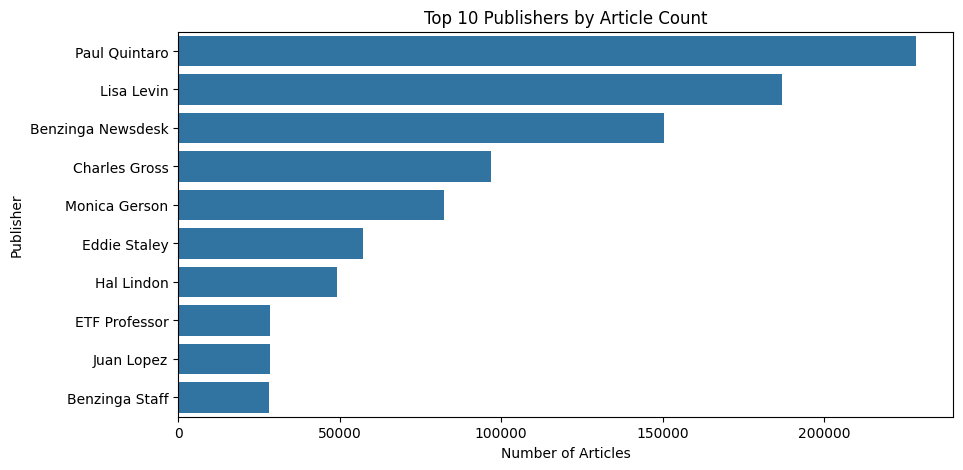

In [17]:
# Count the number of articles per publisher to identify which publishers are most active.
publisher_counts = df['publisher'].value_counts()
top_publishers = publisher_counts.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title("Top 10 Publishers by Article Count")
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")
plt.show()


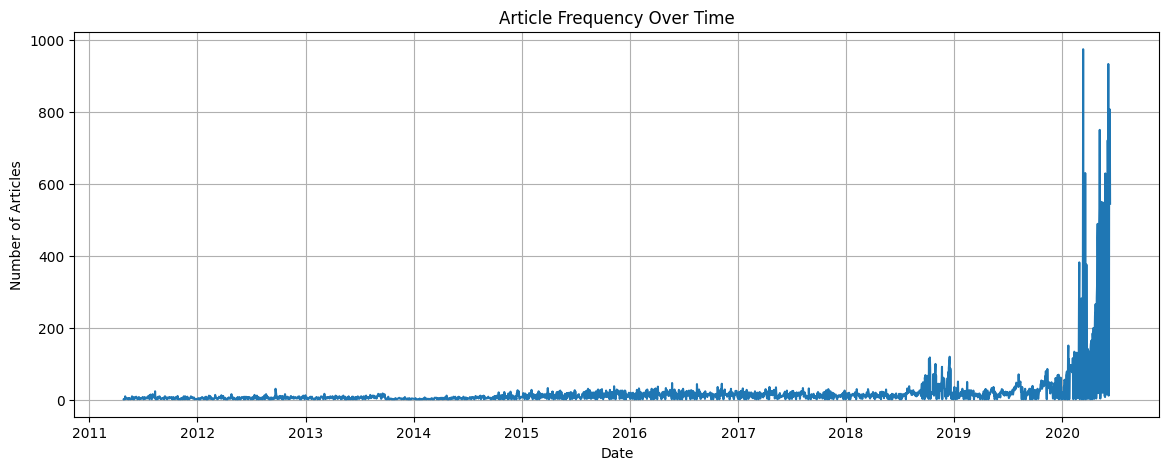

In [18]:
# Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.
df['date'] = pd.to_datetime(df['date'], errors='coerce')

articles_per_day = df.groupby(df['date'].dt.date).size()

plt.figure(figsize=(14, 5))
articles_per_day.plot()
plt.title("Article Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.show()


# Text Analysis(Topic Modeling):

### Methods for Topic Modeling

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Sample data (replace with your actual data)
data = {'headline': [
    "Apple earnings beat estimates", 
    "Tesla stock rises on new model", 
    "Apple launches new iPhone",
    "Tesla recalls vehicles",
    "Microsoft acquires Activision"
]}
dff = pd.DataFrame(df)

# Minimal cleaning
dff['cleaned_headline'] = dff['headline'].str.lower().str.replace(r'[^\w\s]', '')

# Vectorize with safe defaults
vectorizer = CountVectorizer(stop_words='english', min_df=1, max_df=1.0)
X = vectorizer.fit_transform(dff['cleaned_headline'].head(10))

# Check vocabulary
print(f"Vocabulary: {vectorizer.get_feature_names_out()}")

# Run LDA
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

# Print topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-3:]])
    # print("".join([vectorizer.get_feature_names_out()[i] for i in lda.components_[idx].argsort()[-3:]]))

Vocabulary: ['10' '46' '52' '71' '85' '87' '88' '95' 'agilent' 'better' 'biggest'
 'cfra' 'changes' 'company' 'day' 'eps' 'expected' 'fargo' 'friday'
 'higher' 'highs' 'hit' 'hold' 'lowers' 'maintains' 'mid' 'movers'
 'moving' 'neutral' 'overweight' 'price' 'q2' 'raises' 'reported'
 'results' 'sales' 'securities' 'session' 'shares' 'stocks' 'target'
 'technologies' 'trading' 'ubs' 'wednesday' 'week' 'wells']
Topic 0:
['price', 'agilent', 'technologies']
Topic 1:
['stocks', 'biggest', 'friday']


# Time Series Analysis:

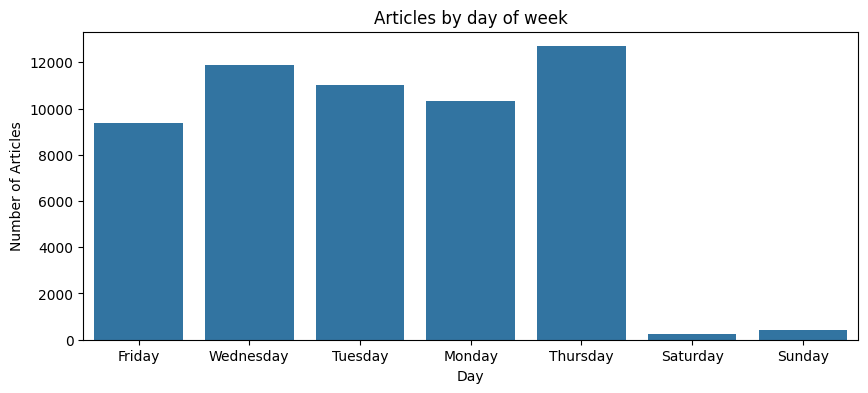

In [ ]:
df['date'] = pd.to_datetime(df['date'])  # Convert to datetime
df['day_of_week'] = df['date'].dt.day_name()  
df['hour'] = df['date'].dt.hour

# if df['date'].dt.hour.notnull().all():
plt.figure(figsize=(10, 4))
sns.countplot(x='day_of_week', data=df)
plt.title("Articles by day of week")
plt.xlabel("Day")
plt.ylabel("Number of Articles")
plt.show()

In [13]:
# check df has date column null values
if df['date'].isnull().any():
    print("There are null values in the 'date' column.")

# remove null values in the 'date' column
df = df.dropna(subset=['date'])

# Check if the 'date' column is now clean
if not df['date'].isnull().any():
    print("The 'date' column has been cleaned and contains no null values.")

There are null values in the 'date' column.
The 'date' column has been cleaned and contains no null values.


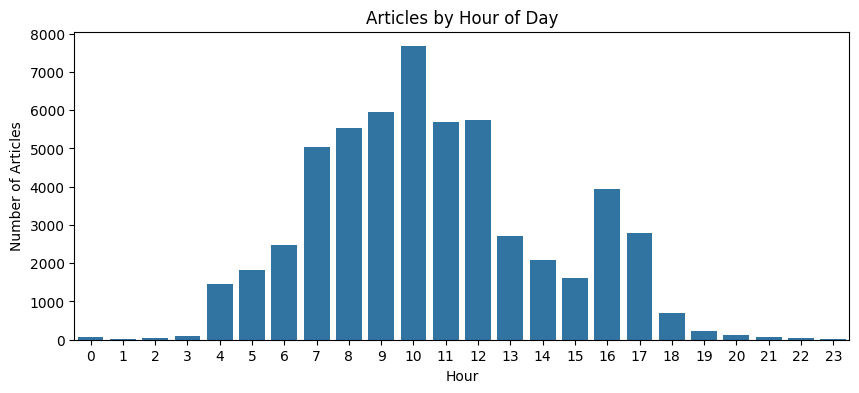

In [14]:
if df['date'].dt.hour.notnull().all():
    df['hour'] = df['date'].dt.hour
    plt.figure(figsize=(10, 4))
    sns.countplot(x='hour', data=df)
    plt.title("Articles by Hour of Day")
    plt.xlabel("Hour")
    plt.ylabel("Number of Articles")
    plt.show()


# Publisher Analysis:

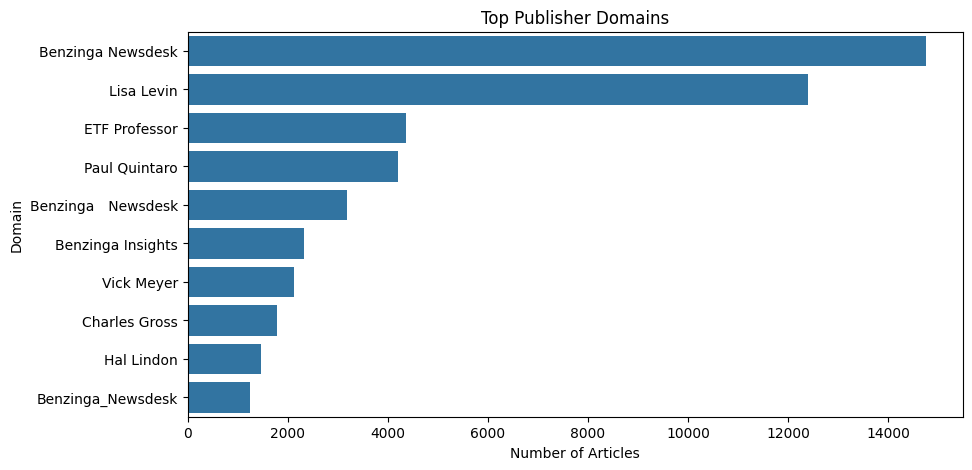

In [15]:
def extract_domain(publisher):
    if '@' in str(publisher):
        return str(publisher).split('@')[-1]
    return publisher

df['publisher_domain'] = df['publisher'].apply(extract_domain)

top_domains = df['publisher_domain'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_domains.values, y=top_domains.index)
plt.title("Top Publisher Domains")
plt.xlabel("Number of Articles")
plt.ylabel("Domain")
plt.show()
